In [26]:
#lead_time since 1 march
import pandas as pd

file_path = r"C:\Users\ElifYilmaz\Downloads\feature importance.csv"

df = pd.read_csv(file_path)



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REQUESTID               21360 non-null  int64  
 1   ZIPREGION               20194 non-null  object 
 2   EVALUATIONTIME          19415 non-null  object 
 3   DESIREDINSTALLATIONEND  19420 non-null  object 
 4   ELECTRICITYBILL         13689 non-null  float64
 5   MKTGPARAMSCORE          20293 non-null  object 
 6   NETCONTRACTSIGNED       653 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [28]:
# impute contract signed to 0
df['NETCONTRACTSIGNED'] = df['NETCONTRACTSIGNED'].fillna(0)

In [ ]:
# understanding overall
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic info:")
print(df.info())

Dataset shape: (21360, 7)

Data types:
REQUESTID                   int64
ZIPREGION                  object
EVALUATIONTIME             object
DESIREDINSTALLATIONEND     object
ELECTRICITYBILL           float64
MKTGPARAMSCORE             object
NETCONTRACTSIGNED         float64
dtype: object

Missing values per column:
REQUESTID                    0
ZIPREGION                 1166
EVALUATIONTIME            1945
DESIREDINSTALLATIONEND    1940
ELECTRICITYBILL           7671
MKTGPARAMSCORE            1067
NETCONTRACTSIGNED            0
dtype: int64

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REQUESTID               21360 non-null  int64  
 1   ZIPREGION               20194 non-null  object 
 2   EVALUATIONTIME          19415 non-null  object 
 3   DESIREDINSTALLATIONEND  19420 non-null  object 
 4   ELECTRI

In [6]:
# Step 2: Inspect categorical columns for issues
categorical_cols = ['ZIPREGION', 'EVALUATIONTIME', 'DESIREDINSTALLATIONEND', 'MKTGPARAMSCORE']

for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"{col} - Unique values ({df[col].nunique()}):")
    print(f"Missing values: {df[col].isnull().sum()}")
    print("Top 10 most common values:")
    print(df[col].value_counts().head(10))
    
    # If not too many unique values, show them all
    if df[col].nunique() <= 15:
        print("All unique values:")
        print(df[col].unique())


ZIPREGION - Unique values (20):
Missing values: 1166
Top 10 most common values:
ZIPREGION
Lombardia                3355
Lazio                    2055
Piemonte                 1833
Emilia-Romagna           1805
Veneto                   1607
Puglia                   1523
Toscana                  1371
Sicilia                  1232
Friuli-Venezia Giulia    1190
Campania                  750
Name: count, dtype: int64

EVALUATIONTIME - Unique values (8):
Missing values: 1945
Top 10 most common values:
EVALUATIONTIME
understand_need           7628
understand_purchase       7449
evaluation                3342
curious                    967
more_than_six_months        17
less_than_three_months       5
expert                       4
three_to_six_months          3
Name: count, dtype: int64
All unique values:
['understand_purchase' 'more_than_six_months' 'less_than_three_months'
 'three_to_six_months' 'understand_need' 'curious' nan 'evaluation'
 'expert']

DESIREDINSTALLATIONEND - Unique values 

In [ ]:
# impute categorical columns

# ZIPREGION - Italian regions, looks clean, just fill missing
df['ZIPREGION'] = df['ZIPREGION'].fillna('Unknown')

# EVALUATIONTIME - customer evaluation stage, looks clean
df['EVALUATIONTIME'] = df['EVALUATIONTIME'].fillna('Unknown')

# DESIREDINSTALLATIONEND - installation timeline, looks clean  
df['DESIREDINSTALLATIONEND'] = df['DESIREDINSTALLATIONEND'].fillna('Unknown')

# MKTGPARAMSCORE - marketing channels, looks clean
df['MKTGPARAMSCORE'] = df['MKTGPARAMSCORE'].fillna('Unknown')

print("Categorical columns cleaned - no more missing values:")
categorical_cols = ['ZIPREGION', 'EVALUATIONTIME', 'DESIREDINSTALLATIONEND', 'MKTGPARAMSCORE']
for col in categorical_cols:
    print(f"{col}: {df[col].isnull().sum()} missing")

Categorical columns cleaned - no more missing values:
ZIPREGION: 0 missing
EVALUATIONTIME: 0 missing
DESIREDINSTALLATIONEND: 0 missing
MKTGPARAMSCORE: 0 missing


In [8]:
# Check your numeric columns
print("\nELECTRICITYBILL analysis:")
print(f"Missing values: {df['ELECTRICITYBILL'].isnull().sum()}")
print(f"Zero values: {(df['ELECTRICITYBILL'] == 0).sum()}")
print("Basic stats:")
print(df['ELECTRICITYBILL'].describe())

print(f"\nNETCONTRACTSIGNED analysis:")
print(f"Missing values: {df['NETCONTRACTSIGNED'].isnull().sum()}")
print("Value counts:")
print(df['NETCONTRACTSIGNED'].value_counts())

# Handle ELECTRICITYBILL missing values
df['ELECTRICITYBILL'] = df['ELECTRICITYBILL'].fillna(0)

print(f"\nAfter filling ELECTRICITYBILL:")
print(f"Missing: {df['ELECTRICITYBILL'].isnull().sum()}")
print(f"Zeros: {(df['ELECTRICITYBILL'] == 0).sum()}")


ELECTRICITYBILL analysis:
Missing values: 7671
Zero values: 264
Basic stats:
count    13689.000000
mean       177.991599
std       1136.653009
min       -160.000000
25%         90.000000
50%        100.000000
75%        140.000000
max      96320.000000
Name: ELECTRICITYBILL, dtype: float64

NETCONTRACTSIGNED analysis:
Missing values: 0
Value counts:
NETCONTRACTSIGNED
0.0    20878
1.0      482
Name: count, dtype: int64

After filling ELECTRICITYBILL:
Missing: 0
Zeros: 7935


In [ ]:
# netcontrcatsigned imbalance check 

print("Target variable (NETCONTRACTSIGNED) analysis:")
print("Value counts:")
print(df['NETCONTRACTSIGNED'].value_counts())
print("\nPercentages:")
print(df['NETCONTRACTSIGNED'].value_counts(normalize=True) * 100)

# This confirms your 98% vs 2% imbalance (20878 vs 482)
class_imbalance = df['NETCONTRACTSIGNED'].value_counts(normalize=True)
print(f"\nClass imbalance: {class_imbalance[0.0]:.1%} vs {class_imbalance[1.0]:.1%}")

Target variable (NETCONTRACTSIGNED) analysis:
Value counts:
NETCONTRACTSIGNED
0.0    20878
1.0      482
Name: count, dtype: int64

Percentages:
NETCONTRACTSIGNED
0.0    97.743446
1.0     2.256554
Name: proportion, dtype: float64

Class imbalance: 97.7% vs 2.3%


In [29]:
#encoding

from sklearn.preprocessing import OrdinalEncoder

# Define the order for EVALUATIONTIME
evaluation_order = [
    'curious',
    'understand_need', 
    'understand_purchase',
    'evaluation'
   
]

# Handle missing values
df['EVALUATIONTIME'] = df['EVALUATIONTIME'].fillna('unknown')

# Replace the original column directly
ordinal_enc = OrdinalEncoder(categories=[evaluation_order], handle_unknown='use_encoded_value', unknown_value=-1)
df['EVALUATIONTIME'] = ordinal_enc.fit_transform(df[['EVALUATIONTIME']])

In [31]:
# Define the order for DESIREDINSTALLATIONEND (soonest to latest)
installation_order = [

    'one_to_two_months',       # 1-2 months
    'three_to_four_months',    # 3-4 months  
    'more_than_5_months',      # 5+ months
    'dont_know'                # uncertain (longest/no timeline)
]

# Handle missing values and replace the original column
df['DESIREDINSTALLATIONEND'] = df['DESIREDINSTALLATIONEND'].fillna('unknown')

ordinal_enc_install = OrdinalEncoder(categories=[installation_order], handle_unknown='use_encoded_value', unknown_value=-1)
df['DESIREDINSTALLATIONEND'] = ordinal_enc_install.fit_transform(df[['DESIREDINSTALLATIONEND']])

# Check the results
print(df['DESIREDINSTALLATIONEND'].value_counts().sort_index())

DESIREDINSTALLATIONEND
-1.0    1946
 0.0    7206
 1.0    6743
 2.0    1989
 3.0    3476
Name: count, dtype: int64


In [32]:
# See the encoded values and their counts
print(df['EVALUATIONTIME'].value_counts().sort_index())
print(df['DESIREDINSTALLATIONEND'].value_counts().sort_index())

EVALUATIONTIME
-1.0    1974
 0.0     967
 1.0    7628
 2.0    7449
 3.0    3342
Name: count, dtype: int64
DESIREDINSTALLATIONEND
-1.0    1946
 0.0    7206
 1.0    6743
 2.0    1989
 3.0    3476
Name: count, dtype: int64


-1.0    25    # unknown values (NaN + misplaced timeline values)
 0.0   967    # curious
 1.0  7628    # understand_need  
 2.0  7449    # understand_purchase
 3.0  3342    # evaluation
 4.0     4    # expert

In [33]:
from sklearn.preprocessing import LabelEncoder


# Encode all categorical columns
categorical_cols = ['ZIPREGION', 'MKTGPARAMSCORE']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}: now has {df[col].nunique()} unique values (0 to {df[col].max()})")

Encoded ZIPREGION: now has 21 unique values (0 to 20)
Encoded MKTGPARAMSCORE: now has 14 unique values (0 to 13)


In [34]:
print("\nFinal dataset info:")
print(df.info())
print("\nAny remaining missing values:")
print(df.isnull().sum())
print("\nFinal shape:", df.shape)

# Quick peek at the cleaned data
print("\nFirst 5 rows of cleaned data:")
print(df.head())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21360 entries, 0 to 21359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REQUESTID               21360 non-null  int64  
 1   ZIPREGION               21360 non-null  int64  
 2   EVALUATIONTIME          21360 non-null  float64
 3   DESIREDINSTALLATIONEND  21360 non-null  float64
 4   ELECTRICITYBILL         13689 non-null  float64
 5   MKTGPARAMSCORE          21360 non-null  int64  
 6   NETCONTRACTSIGNED       21360 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.1 MB
None

Any remaining missing values:
REQUESTID                    0
ZIPREGION                    0
EVALUATIONTIME               0
DESIREDINSTALLATIONEND       0
ELECTRICITYBILL           7671
MKTGPARAMSCORE               0
NETCONTRACTSIGNED            0
dtype: int64

Final shape: (21360, 7)

First 5 rows of cleaned data:
   REQUESTID  ZIPREGIO

Feature Importance Analysis for Imbalanced Data

In [35]:
# set up the train test split 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Prepare features and target
X = df.drop(['NETCONTRACTSIGNED', 'REQUESTID'], axis=1)  # Remove target and ID
y = df['NETCONTRACTSIGNED']

print("Features for analysis:")
print(X.columns.tolist())
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
print("Class distribution in train set:")
print(y_train.value_counts(normalize=True))

Features for analysis:
['ZIPREGION', 'EVALUATIONTIME', 'DESIREDINSTALLATIONEND', 'ELECTRICITYBILL', 'MKTGPARAMSCORE']
Feature shape: (21360, 5)
Target shape: (21360,)

Train set: (17088, 5), Test set: (4272, 5)
Class distribution in train set:
NETCONTRACTSIGNED
0.0    0.977411
1.0    0.022589
Name: proportion, dtype: float64


Method 1: Random Forest with Class Balancing



In [36]:
# Train Random Forest with class balancing (handles imbalance)
rf_balanced = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced',  # This handles the imbalance!
    random_state=42
)
rf_balanced.fit(X_train, y_train)

# Get feature importance
rf_importance = rf_balanced.feature_importances_
rf_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance (Balanced):")
print(rf_importance_df)

Random Forest Feature Importance (Balanced):
                  feature  importance
0               ZIPREGION    0.305943
3         ELECTRICITYBILL    0.294791
4          MKTGPARAMSCORE    0.192314
2  DESIREDINSTALLATIONEND    0.104643
1          EVALUATIONTIME    0.102309


In [37]:
# Permutation importance - often better for imbalanced data
perm_importance = permutation_importance(
    rf_balanced, X_test, y_test, 
    n_repeats=10, 
    random_state=42,
    scoring='roc_auc'  # Good metric for imbalanced data
)

perm_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

print("\nPermutation Importance:")
print(perm_importance_df)


Permutation Importance:
                  feature  importance       std
4          MKTGPARAMSCORE    0.057984  0.023125
0               ZIPREGION    0.056649  0.016937
2  DESIREDINSTALLATIONEND    0.018936  0.018485
3         ELECTRICITYBILL    0.000722  0.024159
1          EVALUATIONTIME   -0.004030  0.016017


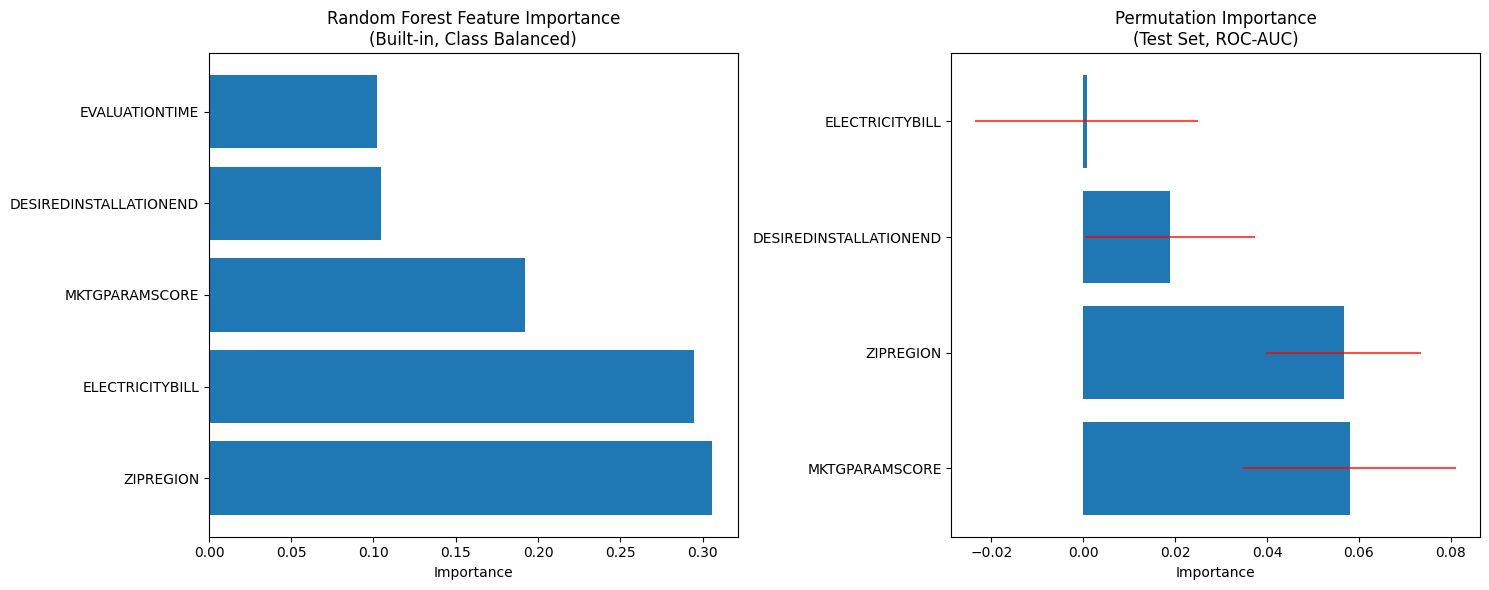

Model Performance:
ROC-AUC: 0.631

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96      4176
         1.0       0.06      0.19      0.09        96

    accuracy                           0.92      4272
   macro avg       0.52      0.56      0.53      4272
weighted avg       0.96      0.92      0.94      4272



In [38]:
import matplotlib.pyplot as plt

# Plot both methods side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Importance
rf_top = rf_importance_df.head()
ax1.barh(rf_top['feature'], rf_top['importance'])
ax1.set_title('Random Forest Feature Importance\n(Built-in, Class Balanced)')
ax1.set_xlabel('Importance')

# Permutation Importance (only positive values)
perm_positive = perm_importance_df[perm_importance_df['importance'] > 0]
ax2.barh(perm_positive['feature'], perm_positive['importance'])
ax2.errorbar(perm_positive['importance'], perm_positive['feature'], 
             xerr=perm_positive['std'], fmt='none', color='red', alpha=0.7)
ax2.set_title('Permutation Importance\n(Test Set, ROC-AUC)')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Let's also check model performance
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_balanced.predict(X_test)
y_pred_proba = rf_balanced.predict_proba(X_test)[:, 1]

print("Model Performance:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Explainability Analysis



In [16]:
# Let's see HOW each important feature relates to contract signing
important_features = ['MKTGPARAMSCORE', 'ZIPREGION', 'DESIREDINSTALLATIONEND']

for feature in important_features:
    print(f"\n{'='*50}")
    print(f"EXPLAINABILITY: {feature}")
    print('='*50)
    
    # Cross-tabulation with contract signing rates
    crosstab = pd.crosstab(df[feature], df['NETCONTRACTSIGNED'], normalize='index')
    crosstab_counts = pd.crosstab(df[feature], df['NETCONTRACTSIGNED'])
    
    print("Contract signing rates by category:")
    print(f"{'Category':<20} {'No Contract %':<15} {'Contract %':<12} {'Total Samples'}")
    print("-" * 60)
    
    for idx in crosstab.index:
        no_contract = crosstab.loc[idx, 0.0] * 100
        contract = crosstab.loc[idx, 1.0] * 100
        total = crosstab_counts.loc[idx].sum()
        print(f"{idx:<20} {no_contract:<15.1f} {contract:<12.1f} {total}")
    
    # Find best and worst performing categories
    contract_rates = crosstab[1.0].sort_values(ascending=False)
    print(f"\nBest performers: {contract_rates.head(3).to_dict()}")
    print(f"Worst performers: {contract_rates.tail(3).to_dict()}")


EXPLAINABILITY: MKTGPARAMSCORE
Contract signing rates by category:
Category             No Contract %   Contract %   Total Samples
------------------------------------------------------------
0                    96.5            3.5          86
1                    97.6            2.4          2483
2                    98.5            1.5          612
3                    98.6            1.4          6889
4                    95.2            4.8          1807
5                    97.0            3.0          606
6                    98.7            1.3          3493
7                    83.0            17.0         53
8                    100.0           0.0          132
9                    98.3            1.7          1567
10                   93.4            6.6          1067
11                   97.9            2.1          2543
12                   100.0           0.0          2
13                   95.0            5.0          20

Best performers: {7: 0.16981132075471697, 10: 0.

In [19]:
# Let's create actionable business insights
def explain_feature_impact(feature_name, df, target_col='NETCONTRACTSIGNED'):
    """Extract business insights from feature importance"""
    
    print(f"\n🔍 BUSINESS INSIGHTS FOR {feature_name}:")
    print("="*60)
    
    # Calculate conversion rates by category
    conversion_by_cat = df.groupby(feature_name)[target_col].agg(['mean', 'count']).round(4)
    conversion_by_cat.columns = ['conversion_rate', 'sample_count']
    conversion_by_cat = conversion_by_cat.sort_values('conversion_rate', ascending=False)
    
    print("📊 Conversion rates by category (sorted):")
    print(conversion_by_cat)
    
    # Find the best opportunities
    best_category = conversion_by_cat.index[0]
    best_rate = conversion_by_cat.loc[best_category, 'conversion_rate']
    
    worst_category = conversion_by_cat.index[-1]
    worst_rate = conversion_by_cat.loc[worst_category, 'conversion_rate']
    
    print(f"\n💡 KEY INSIGHTS:")
    print(f"• BEST: Category {best_category} converts at {best_rate:.2%}")
    print(f"• WORST: Category {worst_category} converts at {worst_rate:.2%}")
    print(f"• OPPORTUNITY: {best_rate/worst_rate:.1f}x difference between best and worst")
    
    # Statistical significance
    overall_rate = df[target_col].mean()
    print(f"• BASELINE: Overall conversion rate is {overall_rate:.2%}")
    
    return conversion_by_cat

# Apply to your top features
for feature in important_features:
    explain_feature_impact(feature, df)


🔍 BUSINESS INSIGHTS FOR MKTGPARAMSCORE:
📊 Conversion rates by category (sorted):
                conversion_rate  sample_count
MKTGPARAMSCORE                               
7                        0.1698            53
10                       0.0656          1067
13                       0.0500            20
4                        0.0481          1807
0                        0.0349            86
5                        0.0297           606
1                        0.0242          2483
11                       0.0212          2543
9                        0.0172          1567
2                        0.0147           612
3                        0.0142          6889
6                        0.0132          3493
8                        0.0000           132
12                       0.0000             2

💡 KEY INSIGHTS:
• BEST: Category 7 converts at 16.98%
• WORST: Category 12 converts at 0.00%
• OPPORTUNITY: infx difference between best and worst
• BASELINE: Overall conversion rat

C:\Users\ElifYilmaz\AppData\Local\Temp\ipykernel_10640\1335290863.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"• OPPORTUNITY: {best_rate/worst_rate:.1f}x difference between best and worst")
C:\Users\ElifYilmaz\AppData\Local\Temp\ipykernel_10640\1335290863.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"• OPPORTUNITY: {best_rate/worst_rate:.1f}x difference between best and worst")
C:\Users\ElifYilmaz\AppData\Local\Temp\ipykernel_10640\1335290863.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"• OPPORTUNITY: {best_rate/worst_rate:.1f}x difference between best and worst")


In [23]:
# Let's also look at how these features interact
print("\n" + "="*70)
print("🔄 FEATURE INTERACTIONS")
print("="*70)

# Cross-tabulation of top 2 features
top_2_features = ['MKTGPARAMSCORE', 'ZIPREGION']

interaction_table = pd.crosstab(
    [df[top_2_features[0]], df[top_2_features[1]]], 
    df['NETCONTRACTSIGNED'], 
    normalize='index'
).round(3)

print("Contract rates by Marketing Channel × Region combination:")
print(interaction_table[1.0].sort_values(ascending=False).head(10))

# Find the golden combinations
print("\n🏆 GOLDEN COMBINATIONS (Marketing × Region):")
golden_combos = interaction_table[1.0].sort_values(ascending=False).head(5)
for (mktg, region), rate in golden_combos.items():
    volume = len(df[(df['MKTGPARAMSCORE'] == mktg) & (df['ZIPREGION'] == region)])
    print(f"Marketing {mktg} × Region {region}: {rate:.2%} conversion ({volume} customers)")


🔄 FEATURE INTERACTIONS
Contract rates by Marketing Channel × Region combination:
MKTGPARAMSCORE  ZIPREGION
0               6            1.000
7               6            0.500
                5            0.259
4               19           0.222
0               8            0.111
4               1            0.100
7               8            0.100
4               11           0.096
5               17           0.091
                5            0.087
Name: 1.0, dtype: float64

🏆 GOLDEN COMBINATIONS (Marketing × Region):
Marketing 0 × Region 6: 100.00% conversion (1 customers)
Marketing 7 × Region 6: 50.00% conversion (2 customers)
Marketing 7 × Region 5: 25.90% conversion (27 customers)
Marketing 4 × Region 19: 22.20% conversion (9 customers)
Marketing 0 × Region 8: 11.10% conversion (9 customers)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with class balancing
lr_balanced = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)
lr_balanced.fit(X_train, y_train)

# Feature importance from coefficients
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_balanced.coef_[0],
    'abs_coefficient': abs(lr_balanced.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("Logistic Regression Feature Importance:")
print(lr_importance)

# Compare performance
lr_pred_proba = lr_balanced.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_pred_proba)
rf_auc = roc_auc_score(y_test, rf_balanced.predict_proba(X_test)[:, 1])

print(f"\nModel Comparison:")
print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")

Logistic Regression Feature Importance:
                  feature  coefficient  abs_coefficient
1          EVALUATIONTIME    -0.082276         0.082276
2  DESIREDINSTALLATIONEND     0.030106         0.030106
4          MKTGPARAMSCORE     0.020571         0.020571
0               ZIPREGION     0.017656         0.017656
3         ELECTRICITYBILL     0.000050         0.000050

Model Comparison:
Logistic Regression AUC: 0.534
Random Forest AUC: 0.618
